In [20]:
import os
import dask
import yaml
import graphviz
import logging
from pathlib import Path
from datetime import datetime as dt
from kelloggrs.process import *

In [21]:
in_path = Path("../tests/data/sec-sample-pdf")

In [22]:
logger = logging.getLogger("process")
logger.setLevel(logging.DEBUG)
formatter = logging.Formatter(
    "%(asctime)s - %(name)s - %(levelname)s - %(message)s"
)
ch = logging.StreamHandler()
ch.setFormatter(formatter)
ch.setLevel(logging.INFO)
logger.addHandler(ch)

In [24]:
%%time
for image_file in list((in_path / "9999999997-12-008041-index").glob("*.png")):
    process_file(image_file, logger)

2020-08-06 13:31:04,093 - process - INFO - processing file: 9999999997-12-008041-index-page-8.png
2020-08-06 13:31:04,093 - process - INFO - processing file: 9999999997-12-008041-index-page-8.png
2020-08-06 13:31:06,787 - process - INFO - processing file: 9999999997-12-008041-index-page-1.png
2020-08-06 13:31:06,787 - process - INFO - processing file: 9999999997-12-008041-index-page-1.png
2020-08-06 13:31:11,757 - process - INFO - processing file: 9999999997-12-008041-index-page-0.png
2020-08-06 13:31:11,757 - process - INFO - processing file: 9999999997-12-008041-index-page-0.png
2020-08-06 13:31:13,897 - process - INFO - processing file: 9999999997-12-008041-index-page-2.png
2020-08-06 13:31:13,897 - process - INFO - processing file: 9999999997-12-008041-index-page-2.png
2020-08-06 13:31:19,251 - process - INFO - processing file: 9999999997-12-008041-index-page-3.png
2020-08-06 13:31:19,251 - process - INFO - processing file: 9999999997-12-008041-index-page-3.png
2020-08-06 13:31:26,

CPU times: user 4.67 s, sys: 503 ms, total: 5.17 s
Wall time: 34.6 s


# Dask Version

In [25]:
from dask.distributed import Client
client = Client(threads_per_worker=1, n_workers=8)
client

/Users/willthompson/anaconda3/envs/patent/lib/python3.8/site-packages/distributed/node.py:151: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 50639 instead
  warnings.warn(


Client Scheduler: tcp://127.0.0.1:50640 Dashboard: http://127.0.0.1:50639/status,Cluster Workers: 8 Cores: 8 Memory: 17.18 GB


In [29]:
process_tasks = []
for image_file in list((in_path / "9999999997-12-008041-index").glob("*.png")):
    process_tasks.append(dask.delayed(process_file)(image_file, logger))
result = dask.delayed(sum)(process_tasks)

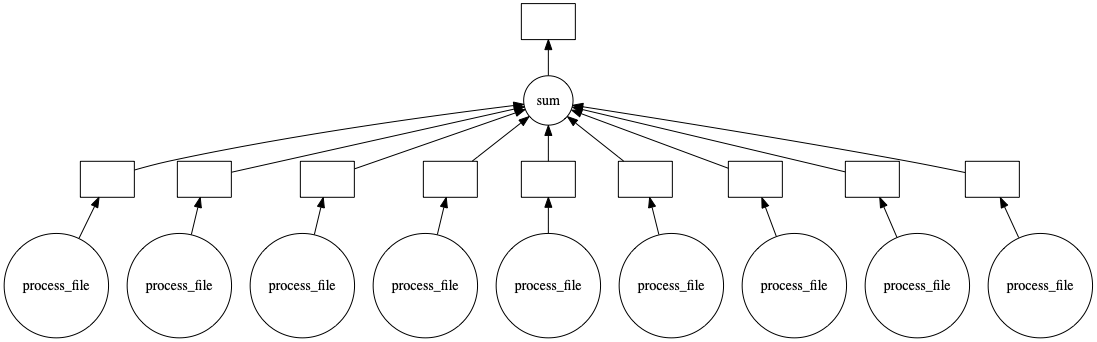

In [30]:
result.visualize()

In [31]:
%%time
result = dask.compute(process_tasks)

CPU times: user 971 ms, sys: 203 ms, total: 1.17 s
Wall time: 9.73 s


In [17]:
logger.info(result)

2020-08-06 12:04:08,528 - process - INFO - ([True, True, True, True, True, True, True, True, True],)


In [18]:
client.close()

In [32]:
dask.config.config 

{'temporary-directory': None,
 'dataframe': {'shuffle-compression': None},
 'array': {'svg': {'size': 120}},
 'optimization': {'fuse': {'active': True,
   'ave-width': 1,
   'max-width': None,
   'max-height': inf,
   'max-depth-new-edges': None,
   'subgraphs': None,
   'rename-keys': True}},
 'distributed': {'version': 2,
  'scheduler': {'allowed-failures': 3,
   'bandwidth': 100000000,
   'blocked-handlers': [],
   'default-data-size': '1kiB',
   'events-cleanup-delay': '1h',
   'idle-timeout': None,
   'transition-log-length': 100000,
   'work-stealing': True,
   'work-stealing-interval': '100ms',
   'worker-ttl': None,
   'pickle': True,
   'preload': [],
   'preload-argv': [],
   'unknown-task-duration': '500ms',
   'default-task-durations': {'rechunk-split': '1us', 'shuffle-split': '1us'},
   'validate': False,
   'dashboard': {'status': {'task-stream-length': 1000},
    'tasks': {'task-stream-length': 100000},
    'tls': {'ca-file': None, 'key': None, 'cert': None},
    'bokeh-